In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import models, layers, optimizers
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.datasets import boston_housing

In [3]:
(train_data, train_target), (test_data, test_target) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [4]:
df = pd.DataFrame(train_data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [0]:
mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

In [6]:
df1 = pd.DataFrame(train_data)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.272246,-0.483615,-0.435762,-0.256833,-0.165227,-0.176443,0.813062,0.116698,-0.626249,-0.595170,1.148500,0.448077,0.825220
1,-0.403427,2.991784,-1.333912,-0.256833,-1.215182,1.894346,-1.910361,1.247585,-0.856463,-0.348433,-1.718189,0.431906,-1.329202
2,0.124940,-0.483615,1.028326,-0.256833,0.628642,-1.829688,1.110488,-1.187439,1.675886,1.565287,0.784476,0.220617,-1.308500
3,-0.401494,-0.483615,-0.869402,-0.256833,-0.361560,-0.324558,-1.236672,1.107180,-0.511142,-1.094663,0.784476,0.448077,-0.652926
4,-0.005634,-0.483615,1.028326,-0.256833,1.328612,0.153642,0.694808,-0.578572,1.675886,1.565287,0.784476,0.389882,0.263497


In [7]:
print(train_data.shape)

(404, 13)


In [0]:
def build_model ():
  model = models.Sequential()
  model.add(layers.Dense(64, activation = "relu", input_shape = (13,)))
  model.add(layers.Dense(64, activation = "relu"))
  model.add(layers.Dense(1))

  model.compile(
      loss = "mse",
      optimizer = optimizers.RMSprop(),
      metrics = ["mae"]
  )
  return model


In [0]:
k = 4
num_val_samples = len(train_data) // k
all_score = []

In [10]:
num_epochs = 100
for i in range(k):
  print("kfolf processinng #", i)

  val_data = train_data[i * num_val_samples: (i + 1 ) * num_val_samples]
  val_target = train_target[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[: i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis = 0)
  partial_train_target = np.concatenate([train_target[: i * num_val_samples], train_target[(i + 1) * num_val_samples:]], axis = 0)
  model = build_model()
  model.fit(
      partial_train_data, partial_train_target, epochs = num_epochs, batch_size = 1, verbose= 0
  )
  val_mse, val_mae = model.evaluate(val_data, val_target, verbose = 0)
  all_score.append(val_mae)

kfolf processinng # 0
kfolf processinng # 1
kfolf processinng # 2
kfolf processinng # 3


In [11]:
print(np.mean(all_score))

2.4345328509807587


In [12]:
num_epochs = 500
all_mae_history = []

for i in range(k):
  print("kfolf processinng #", i)

  val_data = train_data[i * num_val_samples: (i + 1 ) * num_val_samples]
  val_target = train_target[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[: i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis = 0)
  partial_train_target = np.concatenate([train_target[: i * num_val_samples], train_target[(i + 1) * num_val_samples:]], axis = 0)
  model = build_model()
  history = model.fit(
      partial_train_data, partial_train_target, epochs = num_epochs, batch_size = 1, verbose= 0,  validation_data = (val_data, val_target)
  )
  mae_history = history.history['val_mae']
  all_mae_history.append(mae_history)

kfolf processinng # 0
kfolf processinng # 1
kfolf processinng # 2
kfolf processinng # 3


In [13]:
print(np.mean(all_mae_history))

2.474952180325985


In [0]:
avg_mae_history = [
                   np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)
                   ]

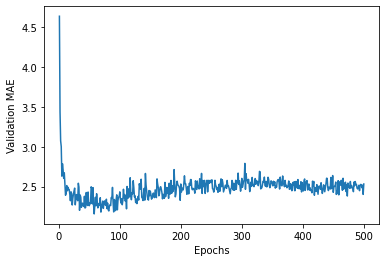

In [15]:
plt.plot(range(1, len(avg_mae_history) + 1), avg_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

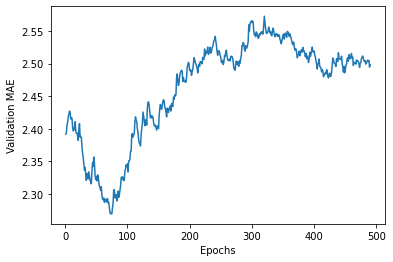

In [19]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
        smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(avg_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [26]:
model = build_model()
k = 4 
for i in range(k):
  print("K fold processing #" ,i)
  val_data = train_data[i * num_val_samples : (i + 1 ) * num_val_samples]
  val_target = train_target[i * num_val_samples : (i + 1 ) * num_val_samples]

  partial_train_data = np.concatenate([train_data[: i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis = 0)
  partial_train_target = np.concatenate([train_target[: i * num_val_samples], train_target[(i + 1) * num_val_samples:]], axis = 0)
  model.fit(
      partial_train_data, partial_train_target, epochs = 80, batch_size = 16, verbose = 0, validation_data = (val_data, val_target)
  )
test_mse, test_mae = model.evaluate(test_data, test_target)

K fold processing # 0
K fold processing # 1
K fold processing # 2
K fold processing # 3
4/4 [==============================] - 0s 2ms/step - loss: 19.5312 - mae: 2.6474


In [27]:
print(test_mae)

2.647444725036621
